# Experiment Tracking using MLFlow

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('data.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


## Binary Encoding of Categorical Variables

In [ ]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


## Checking for Missing Values

In [ ]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Segregating the target variable from the features

In [ ]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

## Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [ ]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

## Tracking using MLFlow

In [ ]:
import mlflow
import os

In [ ]:
mlflow.set_experiment("loan_status")

2023/01/23 21:48:12 INFO mlflow.tracking.fluent: Experiment with name 'loan_status' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/harshit/Scaler/classes/lectures/dsml_feb_adv_mlops/dsml_feb_mlflow/mlruns/1', experiment_id='1', lifecycle_stage='active', name='loan_status', tags={}>

In [ ]:
with mlflow.start_run():
    ##training the model
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)
    
    ##capturing validation acc
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)
    
    ##capturing training acc
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_val, pred_val)
    
    mlflow.set_tag('mlflow.runName', 'first_run')
    mlflow.log_param('max_depth', 4)
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)
    
    mlflow.sklearn.log_model(model_rf, "model")
    

## Training on a new dataset

In [ ]:
train_df = pd.read_csv('data_new.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
with mlflow.start_run():
    ##training the model
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)
    
    ##capturing validation acc
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)
    
    ##capturing training acc
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_val, pred_val)
    
    mlflow.set_tag('mlflow.runName', 'new_data_version')
    mlflow.log_param('max_depth', 4)
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)
    
    mlflow.sklearn.log_model(model_rf, "model")

## Hyperparameter tuning with MLFlow

In [ ]:
def mlflow_runs(n_est, max_dep, i):
    with mlflow.start_run():
        ##training the model
        model_rf = RandomForestClassifier(n_estimators=n_est, 
                                          max_depth=max_dep, 
                                          random_state=5)
        model_rf.fit(X_train, y_train)

        ##capturing validation acc
        pred_val = model_rf.predict(X_val)
        val_acc = accuracy_score(y_val, pred_val)

        ##capturing training acc
        pred_train = model_rf.predict(X_train)
        train_acc = accuracy_score(y_val, pred_val)
        
        run_name = f"hyperparameter_tuning_{i}"

        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param('n_estimators', n_est)
        mlflow.log_param('max_depth', max_dep)
        mlflow.log_metric('val_acc', val_acc)
        mlflow.log_metric('train_acc', train_acc)
        mlflow.set_tag("data_file", "data_new.csv")
        
        mlflow.sklearn.log_model(model_rf, "model")

In [ ]:
mlflow_runs(10, 2, 1)
mlflow_runs(20, 2, 2)
mlflow_runs(30, 2, 3)
mlflow_runs(40, 2, 4)
mlflow_runs(10, 4, 5)
mlflow_runs(20, 4, 6)
mlflow_runs(30, 4, 7)
mlflow_runs(40, 4, 8)
mlflow_runs(10, 8, 9)
mlflow_runs(20, 8, 10)
mlflow_runs(40, 8, 11)

## Trying a different model - KNN

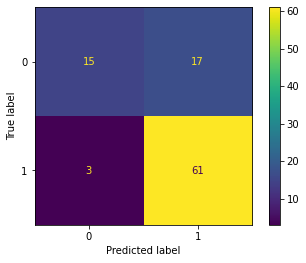

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with mlflow.start_run():
    ##training the model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    ##capturing validation acc
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)
    
    ##capturing training acc
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_val, pred_val)
    
    mlflow.set_tag('mlflow.runName', 'knn')
    mlflow.log_param('neighbors', 5)
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)
    mlflow.set_tag("data_file", "data_new.csv")
    
    cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
    cm.figure_.savefig("confusion_mat.png")
    mlflow.log_artifact("confusion_mat.png")
    
    
    mlflow.sklearn.log_model(knn_model, "model")